In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science.mplstyle')
import pandas as pd
import glob

In [4]:
#box_size = number of points in the box
#step_size is number of points skipped 
def cont_points(x, y, box_size, step_size):
    num_steps = len(x)-box_size
    cont_y = []
    cont_x = []
    i=0
    while i in range(num_steps):
        cont_y.append(np.mean(y[i:i+box_size]))
        #cont_x.append((x[i]+x[i+box_size-1])/2)
        cont_x.append(x[int((2*i+box_size-1)/2)])
        i=i+step_size
    return cont_x, cont_y

### CC CI testing

Testing continuum removal on meteorite with a polyfit in each box. Did not use.

In [36]:
ci_org = pd.read_csv('org_meteorite.txt').values

In [37]:
f = np.loadtxt('org_meteorite.txt').T

In [38]:
f1_x = f[0][250:390]
f1_y = f[1][250:390]

In [39]:
cont_x1, cont_y1 = cont_points(f1_x,f1_y,41,5)

fit1 = np.polyfit(cont_x1, cont_y1, 9)
cont_fit1 = np.poly1d(fit1)

cont_x0, cont_y0 = cont_points(f[0],f[1],41,5)

fit0 = np.polyfit(cont_x0, cont_y0, 9)
cont_fit0 = np.poly1d(fit0)

Text(0, 0.5, 'reflectance')

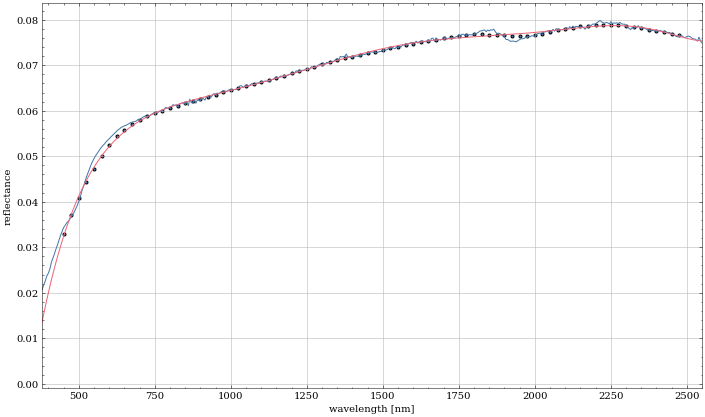

In [40]:
plt.figure(figsize=(10,6))
plt.plot(f[0],f[1])
plt.plot(f[0], cont_fit0(f[0]))
plt.scatter(cont_x0, cont_y0, marker='.')
plt.xlim((380,2550))
plt.grid()
plt.xlabel('wavelength [nm]')
plt.ylabel('reflectance')

In [269]:
box_size = 41

new_index_low = int((box_size-1)/2)
new_index_high = len(f[1])-int((box_size-1)/2)-1

#remove continuum
cc_cont_rem_y = f[1][(new_index_low):new_index_high]/cont_y0

#normalize
cc_norm_trunc = (cc_cont_rem_y[35::]-np.amin(cc_cont_rem_y[35::]))/(np.amax(cc_cont_rem_y[35::]) - np.amin(cc_cont_rem_y[35::]))

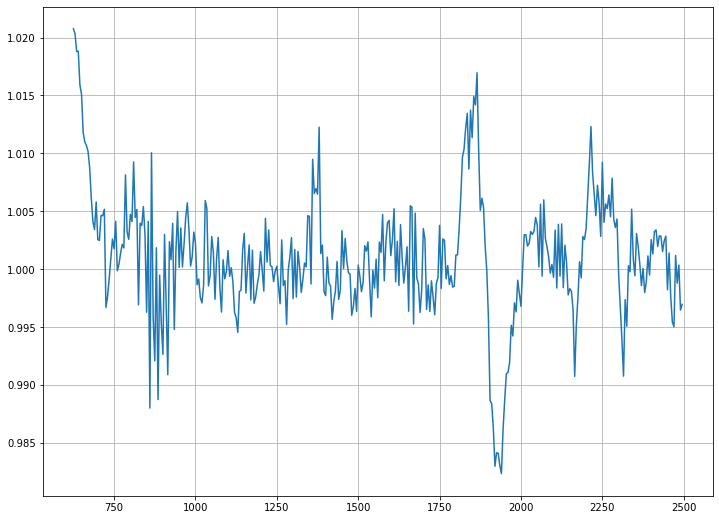

In [271]:
plt.figure(figsize=(12,9))
plt.plot(cont_x0[35::], cc_cont_rem_y[35::])
#plt.plot(cont_x0[35::],cc_norm_trunc)
plt.grid()

### Saponite

This section contains the actual procedure followed for the paper.

In [5]:
sap_raw = np.loadtxt('saponite.txt').T

In [6]:
sap_freqs = sap_raw[0][10::]
sap_spec = sap_raw[1][10::]

In [7]:
box_size = 21
sap_cont_x, sap_cont_y = cont_points(sap_freqs, sap_spec, box_size,1)

sap_cont_x2, sap_cont_y2 = cont_points(sap_cont_x, sap_cont_y, box_size, 1)

new_index_low = int((box_size-1)/2)
new_index_high = len(sap_spec)-int((box_size-1)/2)-1

sap_cont_rem_y = sap_spec[new_index_low:new_index_high]/sap_cont_y


"""
for second box size to compare
"""
box_size2 = 55
sap_cont_x2, sap_cont_y2 = cont_points(sap_freqs, sap_spec, box_size2,1)

new_index_low2 = int((box_size2-1)/2)
new_index_high2 = len(sap_spec)-int((box_size2-1)/2)-1

sap_cont_rem_y2 = sap_spec[new_index_low2:new_index_high2]/sap_cont_y2

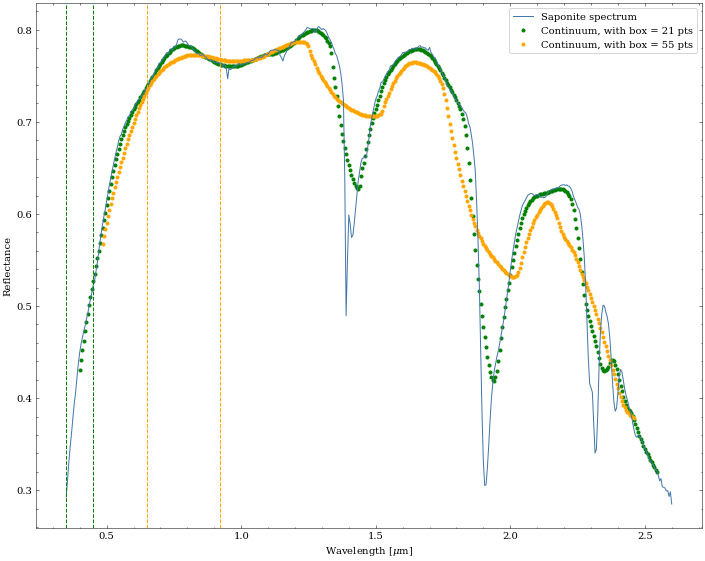

In [41]:
plt.figure(figsize=(10,8))
plt.plot(sap_freqs/1000, sap_spec, label = 'Saponite spectrum')
#plt.scatter(np.array(sap_cont_x)/1000, sap_cont_y, marker = '.', color='g', label='Continuum, with box = 21 pts')
#plt.scatter(np.array(sap_cont_x2)/1000, sap_cont_y2, marker = '.', color='orange', label='Continuum, with box = 55 pts')

plt.scatter(np.array(sap_cont_x)/1000, sap_cont_y, marker = '.', color='g', label='Continuum, with box = 21 pts')
plt.scatter(np.array(sap_cont_x2)/1000, sap_cont_y2, marker = '.', color='orange', label='Continuum, with box = 55 pts')

#plt.scatter(sap_cont_x2, sap_cont_y2, marker = '.')

plt.axvline(x=sap_freqs[0]/1000, color='g', ls='--')
plt.axvline(x=sap_freqs[0+box_size-1]/1000, color='g', ls='--')

plt.axvline(x=sap_freqs[60]/1000, color='orange', ls='--')
plt.axvline(x=sap_freqs[60+box_size2-1]/1000, color='orange', ls='--')

plt.legend()
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Reflectance')
plt.savefig('saponite_boxes.png')

#plt.scatter(sap_cont_x2, sap_cont_y2, marker = '.')

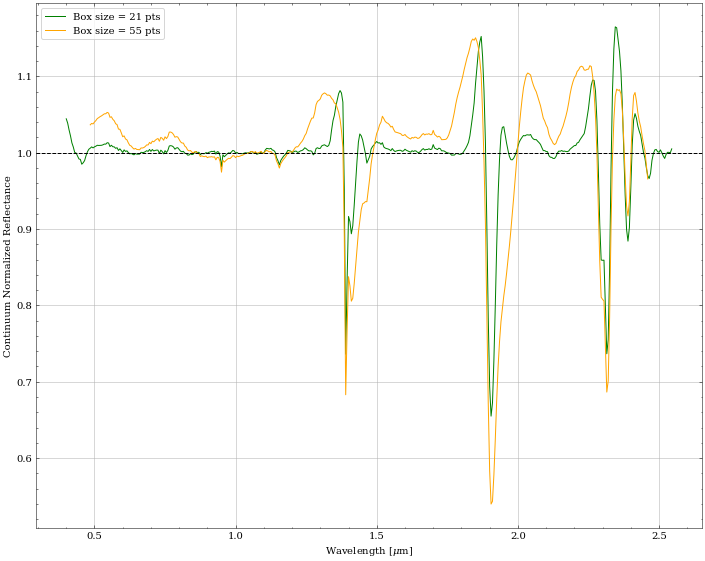

In [42]:
sap_cut = np.minimum(sap_cont_rem_y, 1)
sap_norm_cut = (sap_cut-np.amin(sap_cut))/(np.amax(sap_cut) - np.amin(sap_cut))
sap_norm_true = (sap_cont_rem_y-np.amin(sap_cont_rem_y))/(np.amax(sap_cont_rem_y) - np.amin(sap_cont_rem_y))

plt.figure(figsize=(10,8))
plt.plot(np.array(sap_cont_x)/1000, sap_cont_rem_y, color = 'g', label = 'Box size = 21 pts')
plt.plot(np.array(sap_cont_x2)/1000, sap_cont_rem_y2, color = 'orange', label = 'Box size = 55 pts')
#plt.plot(sap_cont_x, sap_norm_cut)
#plt.plot(sap_cont_x, sap_norm_true)
plt.grid()
#plt.xlim((1.100, 1.700))
#plt.ylim((0.6, 1.15))
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Continuum Normalized Reflectance')
plt.axhline(y=1, color='k', ls='--')
plt.legend()
plt.savefig('cont_rem_boxes.png')

In [43]:
#trying different normalizations: non-normalized, normalized after cutting every value above 1, normalized as is

sap_cut = np.minimum(sap_cont_rem_y, 1)
sap_norm_cut = (sap_cut-np.amin(sap_cut))/(np.amax(sap_cut) - np.amin(sap_cut))
sap_norm_true = (sap_cont_rem_y-np.amin(sap_cont_rem_y))/(np.amax(sap_cont_rem_y) - np.amin(sap_cont_rem_y))

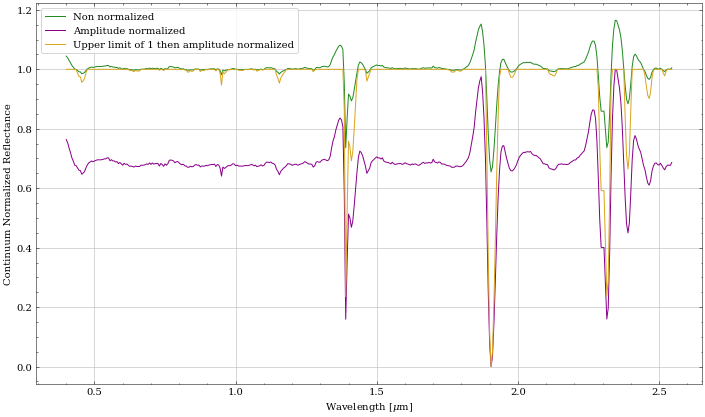

In [44]:
plt.figure(figsize=(10,6))
plt.plot(np.array(sap_cont_x)/1000, sap_cont_rem_y, label = 'Non normalized', color = 'forestgreen')
plt.plot(np.array(sap_cont_x)/1000, sap_norm_true, label = 'Amplitude normalized', color = 'darkmagenta')
plt.plot(np.array(sap_cont_x)/1000, sap_norm_cut, label = 'Upper limit of 1 then amplitude normalized', color = 'goldenrod')

plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Continuum Normalized Reflectance')
plt.legend()
plt.grid()
plt.savefig('sap_normalized_diff.png')

In [12]:
sap_send =np.array((sap_cont_x, sap_cont_rem_y, sap_norm_true, sap_norm_cut)).T
np.savetxt('saponite_norm.txt', sap_send)

### Saponite: polynomial method

Testing the method with a polynomial fit in each box. Did not end up using because doesn't work great.

In [20]:
def cont_poly(x, y, box_size, step_size, poly_order):
    num_steps = len(x)-box_size
    cont_y = []
    cont_x = []
    i=0
    while i in range(num_steps):
        x_box = x[i:i+box_size]
        y_box = y[i:i+box_size]
        fit = np.polyfit(x_box, y_box, poly_order)
        poly_func = np.poly1d(fit)
        
        x_mid = x[int((2*i+box_size-1)/2)]
        
        cont_y.append(poly_func(x_mid))
        cont_x.append(x_mid)

        i=i+step_size

    return cont_x, cont_y

In [21]:
s_poly_x, s_poly_y = cont_poly(sap_freqs, sap_spec, 51,1, 7)

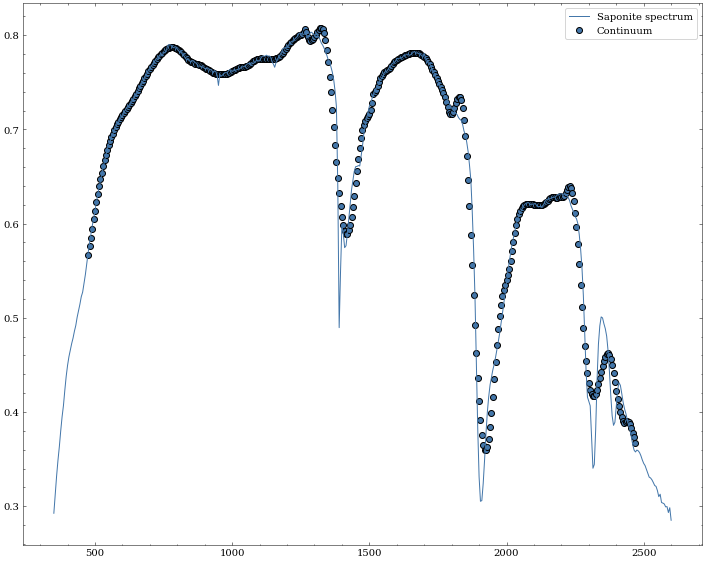

In [22]:
plt.figure(figsize=(10,8))
plt.plot(sap_freqs, sap_spec, label = 'Saponite spectrum')
plt.scatter(s_poly_x, s_poly_y, label = 'Continuum')
plt.legend()

What about just removing absorption features....? Remove points with very high slope. Also didn't work better than originial continuum removal.

In [24]:
def feature_be_gone (x, y, max_slope):
    smooth_x = []
    smooth_y = []
    
    for i in range (len(x)-1):
        slope = (y[i+1]-y[i])/(x[i+1]-x[i])
        
        if slope < (-1*max_slope) or slope > max_slope:
            continue
            
        else:
            smooth_x.append(x[i])
            smooth_y.append(y[i])
            
    return smooth_x, smooth_y
        

In [25]:
slope_sap = []
for i in range(len(sap_freqs)-1):
    slope_sap.append((sap_spec[i+1]-sap_spec[i])/(sap_freqs[i+1]-sap_freqs[i]))

(-0.004, 0.004)

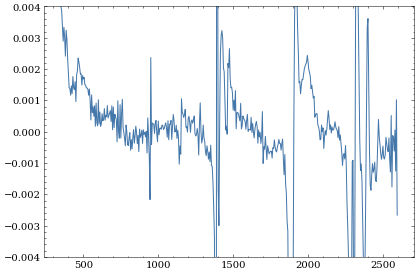

In [27]:
#figure showing slope between two points for saponite spectrum
plt.plot(sap_freqs[:-1], slope_sap)
#good slope limit is 0.003??
plt.ylim((-0.004, 0.004))

In [28]:
smewth_x, smewth_y = feature_be_gone(sap_freqs, sap_spec, 0.001)

In [29]:
s_x, s_y = cont_points(smewth_x, smewth_y, 31, 1)

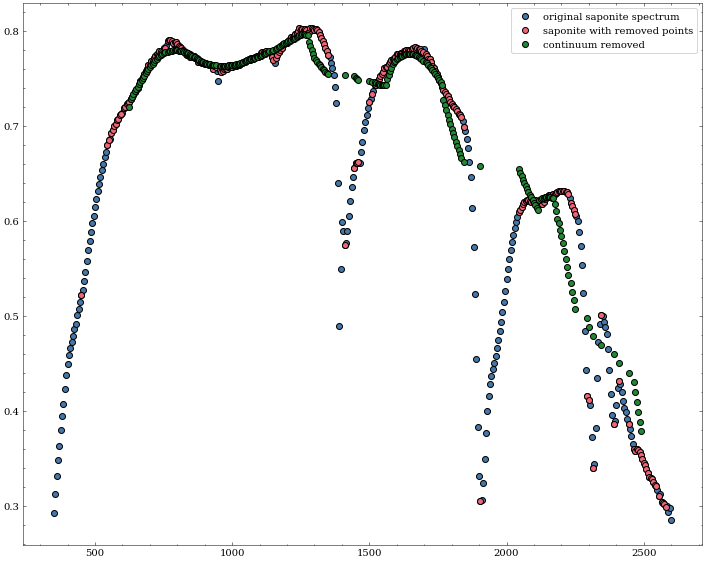

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(sap_freqs, sap_spec, label ='original saponite spectrum')
plt.scatter(smewth_x, smewth_y, label ='saponite with removed points')
plt.scatter(s_x, s_y, label ='continuum removed')
plt.legend()
#plt.xlim((1200,1500))